## Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

## Install Magnitude

In [3]:
!pip install pymagnitude


     |████████████████████████████████| 5.4 MB 23.9 MB/s 
  Created wheel for pymagnitude: filename=pymagnitude-0.1.143-cp37-cp37m-linux_x86_64.whl size=360404808 sha256=cb576f8d2f2fcdf971dddf27c5c8976ef1e6db495b19fee85fcc4202d8e0ffab
  Stored in directory: /root/.cache/pip/wheels/0e/96/d6/b765a1ce34517c193d764b634b1ff7db5e1dcfea2520f17273
Successfully built pymagnitude


## Create a Magnitude object

In [ ]:
from pymagnitude import *

file_path = "/content/drive/My Drive/Colab Notebooks/DeepLearning/hw4/GoogleNews-vectors-negative300.magnitude"
vectors = Magnitude(file_path)

## 1. The dimensionality of these word embeddings

### Query the dimensions of the vectors

In [ ]:
vectors.dim

300

### Total number of vectors

In [ ]:
len(vectors)

3000000

### Answers for the question 1: 
The dimensions of the vectors is 300, and the total number of vectors is 3000000.

## 2. The top-5 most similar words to "picnic"

### Query for the most similar keys 

In [ ]:
result2 = vectors.most_similar("picnic", topn = 5)
result2

[('picnics', 0.7400875),
 ('picnic_lunch', 0.721374),
 ('Picnic', 0.700534),
 ('potluck_picnic', 0.6683274),
 ('picnic_supper', 0.65189123)]

### Plot

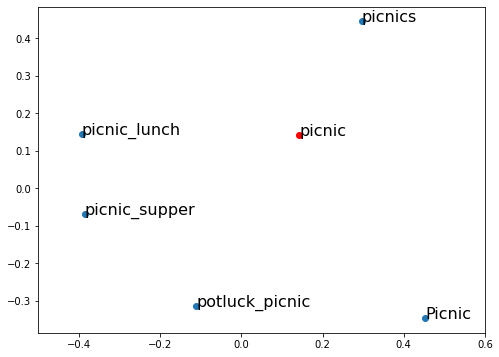

In [ ]:
plt.figure(figsize=(8, 6))
labels, values = zip(*result2)
labels = list(labels)
labels.append('picnic')
df2 = vectors.query(labels)

pca2 = PCA(n_components=2)
df2 = pca2.fit_transform(df2)

plt.plot(df2[:-1, 0], df2[:-1, 1], 'o')
plt.plot(df2[-1, 0], df2[-1, 1], 'ro')
for i in range(len(df2)):
    plt.annotate(labels[i], xy = df2[i], fontsize=16)

plt.xlim([-0.5, 0.6])

plt.show()

### Answers for the question 2: 
The top-5 most similar words to picnic are 'picnics', 'picnic_lunch', 'Picnic', 'potluck_picnic' and 'picnic_supper'.

## 3. Words are not like others

### Query for which key doesn't match a list of keys 

In [ ]:
vectors.doesnt_match(['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette'])

'tissue'

### Plot

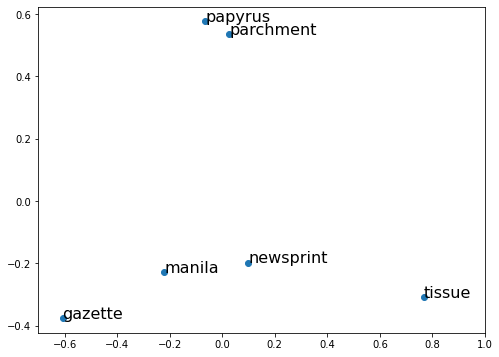

In [ ]:
labels = ['tissue', 'papyrus', 'manila', 'newsprint', 'parchment', 'gazette']
df3 = vectors.query(labels)
pca3 = PCA(n_components=2)
df3 = pca3.fit_transform(df3)

plt.figure(figsize=(8, 6))
plt.plot(df3[:, 0], df3[:, 1], 'o')
for i in range(len(df3)):
    plt.annotate(labels[i], xy = df3[i], fontsize=16)

plt.xlim([-0.7, 1.0])

plt.show()

### Answers for the question 3:
'tissue' is not like the others.

## 4. Solve the analogy

In [ ]:
results4 = vectors.most_similar(positive = ["leg", "throw"], negative = ["jump"])
results4

[('forearm', 0.48294652),
 ('shin', 0.47376165),
 ('elbow', 0.4679689),
 ('metacarpal_bone', 0.46781474),
 ('metacarpal_bones', 0.46605822),
 ('ankle', 0.46434426),
 ('shoulder', 0.46183354),
 ('thigh', 0.45393682),
 ('knee', 0.4455707),
 ('ulna_bone', 0.4423491)]

### Plot

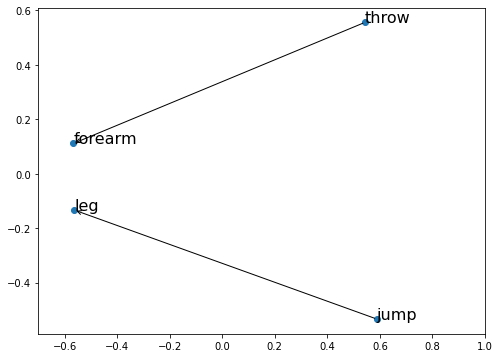

In [ ]:
labels = ["leg"] + [results4[0][0]] + ["jump", "throw"]
df4 = vectors.query(labels)
pca4 = PCA(n_components=2)
df4 = pca4.fit_transform(df4)

plt.figure(figsize=(8, 6))
plt.plot(df4[:, 0], df4[:, 1], 'o')

for i in range(len(df4)):
    plt.annotate(labels[i], xy = df4[i], fontsize=16)

for i in range(len(df4)//2):
    plt.annotate("", xy=df4[i], xytext=df4[i + len(df4)//2], arrowprops=dict(arrowstyle="->", connectionstyle='arc3'))

plt.xlim([-0.7, 1.0])

plt.show()

### Answers for the question 4:
leg is to jump as forearm is to throw.